# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading From Dataset

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
# Displaying the CSV dataset
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Displaying how many rows and columns are present in the dataset
data.shape   

(768, 9)

In [5]:
# Display the data types of each columns present here in the dataset
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Data Preprocessing

In [6]:
# Display everything about the dataset in one table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Used for only displaying the top 5 rows of the dataset 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Used for only displaying the last 5 rows of the dataset
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
#Display only the number of columns a dataset contain
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Checking whether there are any null value present or not
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

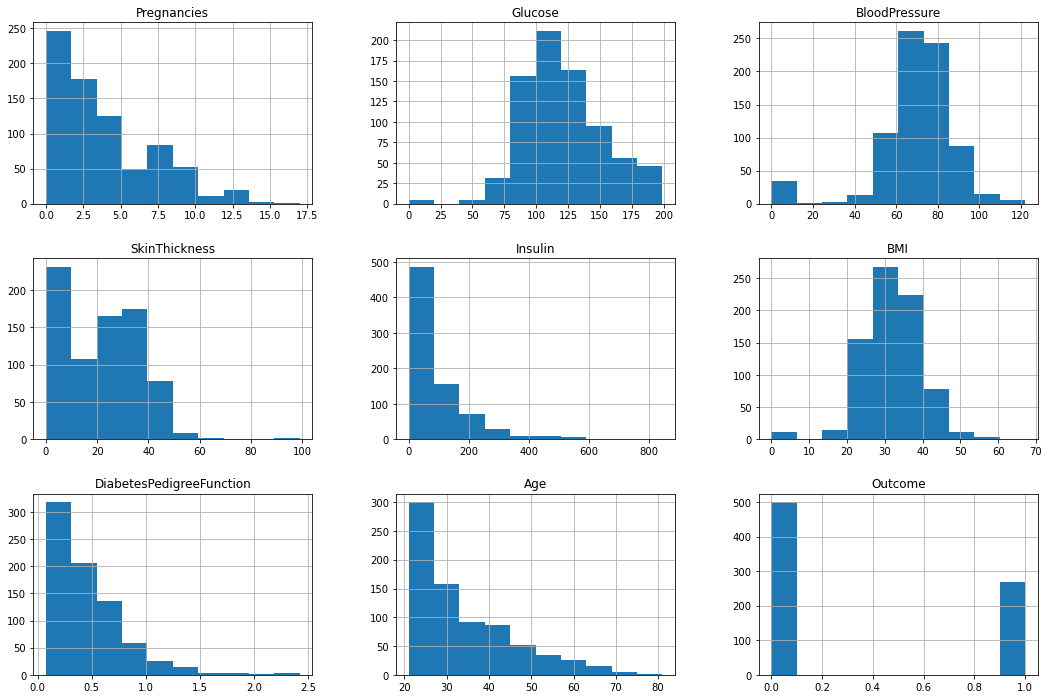

In [11]:
#histograms
data.hist(figsize=(18,12))
plt.show()

Number of patients who are suffer from Diabetes are: 500(65.10%)
Number of patients who are do not suffer from Diabetes are: 268(34.90%)


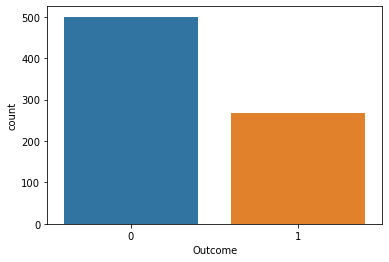

In [12]:
sns.countplot(data=data, x = 'Outcome', label='Count')
D, ND = data['Outcome'].value_counts()
print('Number of patients who are suffer from Diabetes are: {0}({1:2.2f}%)'.format(D,(D/(D+ND))*100))
print('Number of patients who are do not suffer from Diabetes are: {0}({1:2.2f}%)'.format(ND,(ND/(D+ND))*100))

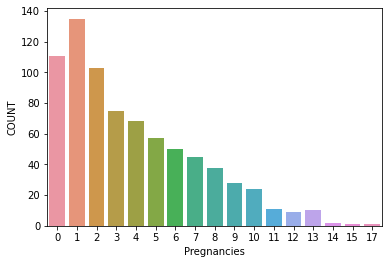

In [13]:
sns.barplot(x=data.Pregnancies.value_counts().index,y=data.Pregnancies.value_counts().values)
plt.xlabel('Pregnancies')
plt.ylabel('COUNT')
plt.show()

<AxesSubplot:xlabel='SkinThickness'>

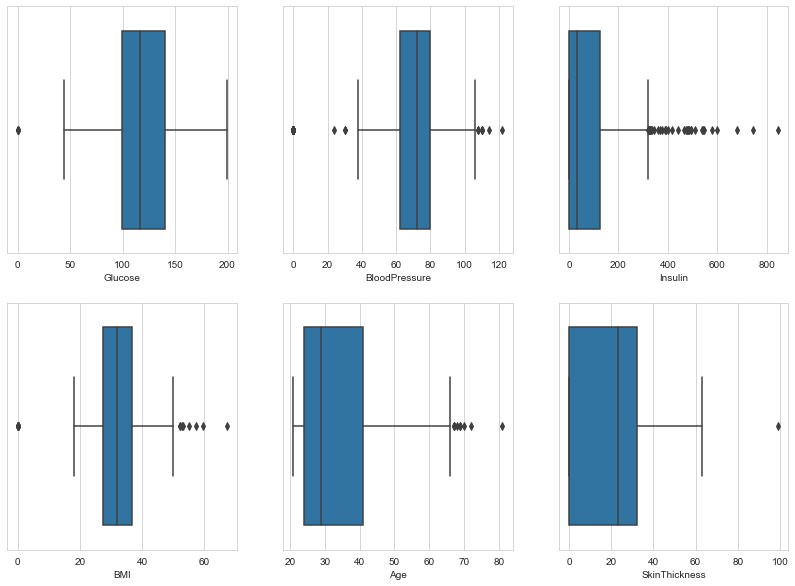

In [14]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

<AxesSubplot:>

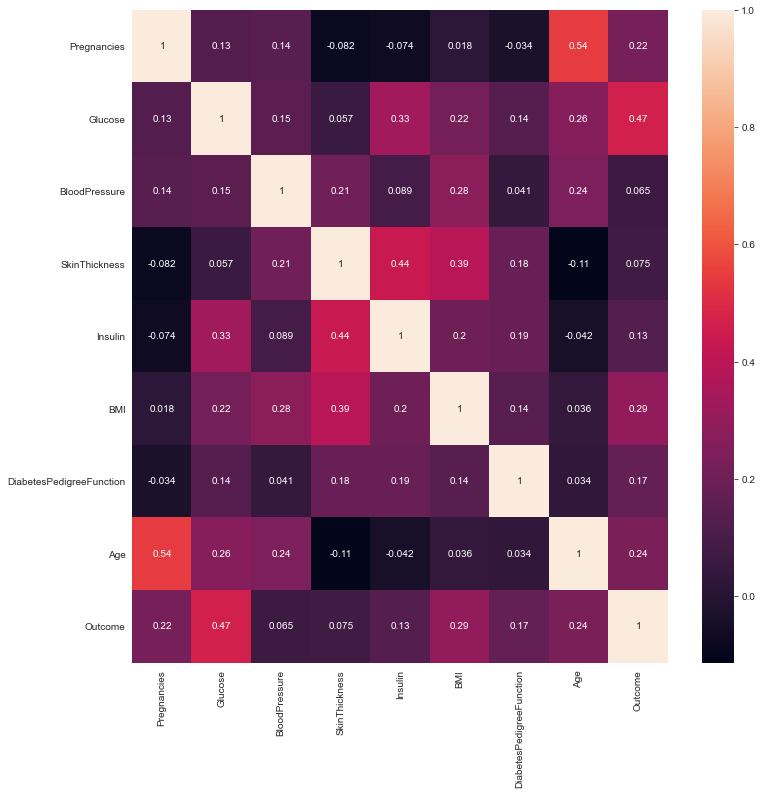

In [15]:
#corelation matrix
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot =True)

# Training and Testing Data

In [16]:
#train_test_splitting of the dataset
x = data.drop(columns = 'Outcome')
# Getting Predicting Value
y = data['Outcome']
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

691
77
691
77


# Model Building

# 1 Logistic Regression

------------------------------------------------------------------------------------------------------------------------
Logistic Regression Training Score: 
 76.99
------------------------------------------------------------------------------------------------------------------------
Logistic Regression Test Score: 
 87.01
------------------------------------------------------------------------------------------------------------------------
Coefficient: 
 [[ 1.16362634e-01  3.33819080e-02 -1.37896163e-02  6.21453466e-04
  -1.16996204e-03  9.26125195e-02  9.93822853e-01  1.82877287e-02]]
------------------------------------------------------------------------------------------------------------------------
Intercept: 
 [-8.32965412]
------------------------------------------------------------------------------------------------------------------------
Mean Squared Error:
 0.12987012987012986
----------------------------------------------------------------------------------------------

<AxesSubplot:>

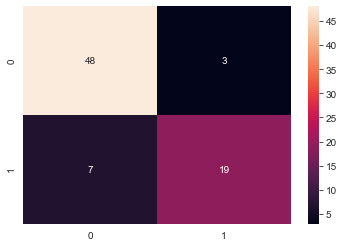

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Creating logistic regression object
lr = LogisticRegression()
#Train the model using the training sets and check score
lr.fit(x_train,y_train) 
#Predict the Output
y_pred=lr.predict(x_test)
y_score1= round(lr.score(x_train,y_train)*100,2)
y_score1_test=round(lr.score(x_test,y_test)*100,2)
y_accuracy1=round(accuracy_score(y_test,y_pred)*100,2)
print('------------------------------------------------------------------------------------------------------------------------')
print('Logistic Regression Training Score: \n', y_score1)
print('------------------------------------------------------------------------------------------------------------------------')
print('Logistic Regression Test Score: \n', y_score1_test)
print('------------------------------------------------------------------------------------------------------------------------')
print('Coefficient: \n', lr.coef_)
print('------------------------------------------------------------------------------------------------------------------------')
print('Intercept: \n', lr.intercept_)
print('------------------------------------------------------------------------------------------------------------------------')
print('Mean Squared Error:\n',mean_squared_error(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
print('R2 score is:\n',r2_score(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
print('Accuracy:\n', y_accuracy1)
print('------------------------------------------------------------------------------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
print('Classification Report is:\n',classification_report(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

# 2 KNN(K Nearest Neighbor)

------------------------------------------------------------------------------------------------------------------------
KNN Training Score: 
 78.15
------------------------------------------------------------------------------------------------------------------------
KNN Test Score: 
 75.32
------------------------------------------------------------------------------------------------------------------------
Accuracy:
 75.32
------------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[43  8]
 [11 15]]
------------------------------------------------------------------------------------------------------------------------
Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        51
           1       0.65      0.58      0.61        26

    accuracy                           0.75        77
   macro avg       0.72      0.71      0.72

<AxesSubplot:>

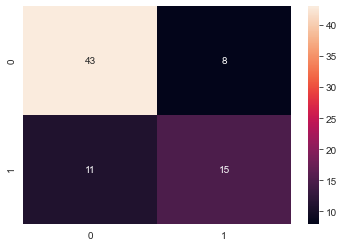

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
#Creating KNN object
knn= KNeighborsClassifier(n_neighbors=7)
#Train the model using the training sets and check score
knn.fit(x_train,y_train)
#Predict the Output
y_pred= knn.predict(x_test)
y_score2 = round(knn.score(x_train, y_train) * 100,2)
y_score2_test = round(knn.score(x_test, y_test) * 100,2)
y_accuracy2=round(accuracy_score(y_test,y_pred)*100,2)
print('------------------------------------------------------------------------------------------------------------------------')
print('KNN Training Score: \n', y_score2)
print('------------------------------------------------------------------------------------------------------------------------')
print('KNN Test Score: \n', y_score2_test)
print('------------------------------------------------------------------------------------------------------------------------')
print('Accuracy:\n', y_accuracy2)
print('------------------------------------------------------------------------------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
print('Classification Report is:\n',classification_report(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

# 3 Support vector machine(SVM)

------------------------------------------------------------------------------------------------------------------------
SVM Training Score: 
 75.25
------------------------------------------------------------------------------------------------------------------------
SVM Test Score: 
 85.71
------------------------------------------------------------------------------------------------------------------------
Accuracy:
 85.71
------------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[48  3]
 [ 8 18]]
------------------------------------------------------------------------------------------------------------------------
Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        51
           1       0.86      0.69      0.77        26

    accuracy                           0.86        77
   macro avg       0.86      0.82      0.83

<AxesSubplot:>

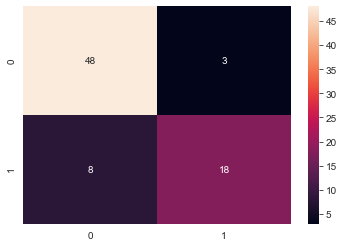

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
#Creating SVM object
svm= SVC(random_state=1)
#Train the model using the training sets and check score
svm.fit(x_train,y_train)
#Predict the Output
y_pred= svm.predict(x_test)
y_score3 = round(svm.score(x_train, y_train) * 100,2)
y_score3_test = round(svm.score(x_test, y_test) * 100,2)
y_accuracy3=round(accuracy_score(y_test,y_pred)*100,2)
print('------------------------------------------------------------------------------------------------------------------------')
print('SVM Training Score: \n', y_score3)
print('------------------------------------------------------------------------------------------------------------------------')
print('SVM Test Score: \n', y_score3_test)
print('------------------------------------------------------------------------------------------------------------------------')
print('Accuracy:\n', y_accuracy3)
print('------------------------------------------------------------------------------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
print('Classification Report is:\n',classification_report(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

# 4 Gaussian Naive Bayes(GNB)

------------------------------------------------------------------------------------------------------------------------
GNB Training Score: 
 75.4
------------------------------------------------------------------------------------------------------------------------
GNB Test Score: 
 80.52
------------------------------------------------------------------------------------------------------------------------
Accuracy:
 80.52
------------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[43  8]
 [ 7 19]]
------------------------------------------------------------------------------------------------------------------------
Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.70      0.73      0.72        26

    accuracy                           0.81        77
   macro avg       0.78      0.79      0.78 

<AxesSubplot:>

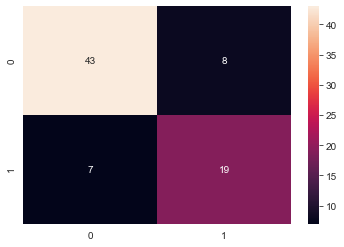

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
#Creating GNB object
gnb = GaussianNB()
#Train the model using the training sets and check score
gnb.fit(x_train,y_train)
#Predict the Output
y_pred=gnb.predict(x_test)
y_score4 = round(gnb.score(x_train, y_train) * 100,2)
y_score4_test = round(gnb.score(x_test, y_test) * 100,2)
y_accuracy4=round(accuracy_score(y_test,y_pred)*100,2)
print('------------------------------------------------------------------------------------------------------------------------')
print('GNB Training Score: \n', y_score4)
print('------------------------------------------------------------------------------------------------------------------------')
print('GNB Test Score: \n', y_score4_test)
print('------------------------------------------------------------------------------------------------------------------------')
print('Accuracy:\n', y_accuracy4)
print('------------------------------------------------------------------------------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
print('Classification Report is:\n',classification_report(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

# 4 Decision Tree

------------------------------------------------------------------------------------------------------------------------
Decision Tree Training Score: 
 83.79
------------------------------------------------------------------------------------------------------------------------
Decision Tree Test Score: 
 77.92
------------------------------------------------------------------------------------------------------------------------
Accuracy:
 77.92
------------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[42  9]
 [ 8 18]]
------------------------------------------------------------------------------------------------------------------------
Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        51
           1       0.67      0.69      0.68        26

    accuracy                           0.78        77
   macro avg       0.75

<AxesSubplot:>

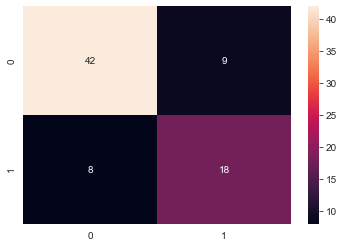

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
y_score5 = round(dtree.score(x_train, y_train) * 100,2)
y_score5_test = round(dtree.score(x_test, y_test) * 100,2)
y_accuracy5=round(accuracy_score(y_test,y_pred)*100,2)
print('------------------------------------------------------------------------------------------------------------------------')
print('Decision Tree Training Score: \n', y_score5)
print('------------------------------------------------------------------------------------------------------------------------')
print('Decision Tree Test Score: \n', y_score5_test)
print('------------------------------------------------------------------------------------------------------------------------')
print('Accuracy:\n', y_accuracy5)
print('------------------------------------------------------------------------------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
print('Classification Report is:\n',classification_report(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

# 6 Random Forest

------------------------------------------------------------------------------------------------------------------------
Random Forest Training Score: 
 100.0
------------------------------------------------------------------------------------------------------------------------
Random Forest Test Score: 
 80.52
------------------------------------------------------------------------------------------------------------------------
Accuracy:
 80.52
------------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[44  7]
 [ 8 18]]
------------------------------------------------------------------------------------------------------------------------
Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        51
           1       0.72      0.69      0.71        26

    accuracy                           0.81        77
   macro avg       0.78

<AxesSubplot:>

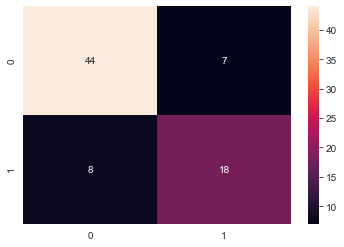

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_score6 = round(rfc.score(x_train, y_train) * 100,2)
y_score6_test = round(rfc.score(x_test, y_test) * 100,2)
y_accuracy6=round(accuracy_score(y_test,y_pred)*100,2)
print('------------------------------------------------------------------------------------------------------------------------')
print('Random Forest Training Score: \n', y_score6)
print('------------------------------------------------------------------------------------------------------------------------')
print('Random Forest Test Score: \n', y_score6_test)
print('------------------------------------------------------------------------------------------------------------------------')
print('Accuracy:\n', y_accuracy6)
print('------------------------------------------------------------------------------------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
print('Classification Report is:\n',classification_report(y_test,y_pred))
print('------------------------------------------------------------------------------------------------------------------------')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")